In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [24]:
pd.set_option('display.max_columns', 500)

In [25]:
df_events = pd.read_csv("/Users/mallikayeturi/Downloads/Dataset/Copy of events.csv")
df_gender = pd.read_csv("/Users/mallikayeturi/Downloads/Dataset/Copy of gender_age.csv")
df_device = pd.read_csv("/Users/mallikayeturi/Downloads/Dataset/Copy of phone_device.csv")

In [26]:
df = df_gender.merge(df_events.merge(df_device, on='device_id'), on='device_id')

In [27]:
df.head(10)

device_id gender  age   group  event_id            timestamp  \
0 -8260683887967679142      M   35  M32-38   2479656  2016-05-01 14:23:37   
1  7477216237379271436      F   37  F33-42    280934  2016-05-04 14:10:03   
2  7477216237379271436      F   37  F33-42    363585  2016-05-04 14:13:30   
3  7477216237379271436      F   37  F33-42    935225  2016-05-06 18:51:15   
4  7477216237379271436      F   37  F33-42   1551108  2016-05-04 14:09:29   
5  7477216237379271436      F   37  F33-42   1901681  2016-05-04 14:10:00   
6  7477216237379271436      F   37  F33-42   1969680  2016-05-04 14:08:17   
7  7477216237379271436      F   37  F33-42   2616450  2016-05-04 14:08:23   
8  6352067998666467520      M   32  M32-38      7665  2016-05-05 09:36:50   
9  6352067998666467520      M   32  M32-38    223251  2016-05-05 10:44:38   

   longitude  latitude phone_brand device_model  
0       0.00      0.00          小米         MI 2  
1     119.57     31.75          华为     荣耀6 plus  
2     119.57     31.75          华为     荣耀6 plus  
3       0.00      0.00          华为     荣耀6 plus  
4     119.57     31.75          华为     荣耀6 plus  
5     119.57     31.75          华为     荣耀6 plus  
6     119.59     31.75          华为     荣耀6 plus  
7     119.57     31.75          华为     荣耀6 plus  
8       0.00      0.00          华为       荣耀畅玩4X  
9       0.00      0.00          华为       荣耀畅玩4X

In [28]:
df.tail(10)

device_id gender  age   group  event_id            timestamp  \
1220464  89181010588227347      M   25  M23-26   1411540  2016-05-06 21:48:13   
1220465  89181010588227347      M   25  M23-26   1458846  2016-05-07 17:56:05   
1220466  89181010588227347      M   25  M23-26   1577164  2016-05-06 10:22:46   
1220467  89181010588227347      M   25  M23-26   1886271  2016-05-04 14:02:11   
1220468  89181010588227347      M   25  M23-26   2186234  2016-05-04 14:07:39   
1220469  89181010588227347      M   25  M23-26   2218742  2016-05-05 19:28:40   
1220470  89181010588227347      M   25  M23-26   2243803  2016-05-06 17:12:46   
1220471  89181010588227347      M   25  M23-26   2336186  2016-05-04 14:08:05   
1220472  89181010588227347      M   25  M23-26   3139128  2016-05-04 14:08:35   
1220473  89181010588227347      M   25  M23-26   3176234  2016-05-06 17:15:32   

         longitude  latitude phone_brand device_model  
1220464       0.00      0.00          小米        MI 2S  
1220465       0.00      0.00          小米        MI 2S  
1220466       0.00      0.00          小米        MI 2S  
1220467     119.26     26.05          小米        MI 2S  
1220468     119.26     26.05          小米        MI 2S  
1220469       0.00      0.00          小米        MI 2S  
1220470       0.00      0.00          小米        MI 2S  
1220471     119.26     26.05          小米        MI 2S  
1220472     119.26     26.05          小米        MI 2S  
1220473       0.00      0.00          小米        MI 2S

## Exploratory Data Analysis

In [29]:
df.shape

(1220474, 10)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220474 entries, 0 to 1220473
Data columns (total 10 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   device_id     1220474 non-null  int64  
 1   gender        1220474 non-null  object 
 2   age           1220474 non-null  int64  
 3   group         1220474 non-null  object 
 4   event_id      1220474 non-null  int64  
 5   timestamp     1220474 non-null  object 
 6   longitude     1220474 non-null  float64
 7   latitude      1220474 non-null  float64
 8   phone_brand   1220474 non-null  object 
 9   device_model  1220474 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 93.1+ MB


We have a data set of 1.2 million samples and 10 features of which 2 are categorical and rest are numerical.

In [31]:
df.describe()

device_id           age      event_id     longitude      latitude
count  1.220474e+06  1.220474e+06  1.220474e+06  1.220474e+06  1.220474e+06
mean  -3.113463e+16  3.348649e+01  1.626750e+06  7.841065e+01  2.183423e+01
std    5.320454e+18  9.738525e+00  9.396839e+05  5.381275e+01  1.564637e+01
min   -9.222957e+18  1.100000e+01  1.000000e+00 -1.800000e+02 -3.380000e+01
25%   -4.667940e+18  2.700000e+01  8.123500e+05  0.000000e+00  0.000000e+00
50%   -1.250469e+17  3.100000e+01  1.627414e+06  1.127700e+02  2.857000e+01
75%    4.631837e+18  3.900000e+01  2.440480e+06  1.171600e+02  3.408000e+01
max    9.220915e+18  8.900000e+01  3.252948e+06  1.511800e+02  5.364000e+01

Summarizing the data

In [32]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values 
    summ['%missing'] = df.isnull().sum().values / len(df)* 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
   
    
    return summ

In [33]:
summary(df)

data shape: (1220474, 10)


data type  #missing  %missing  #unique                    min  \
device_id        int64         0       0.0    23309 -9222956879900150784.0   
gender          object         0       0.0        2                    NaN   
age              int64         0       0.0       78                   11.0   
group           object         0       0.0       12                    NaN   
event_id         int64         0       0.0  1215595                    1.0   
timestamp       object         0       0.0   497663                    NaN   
longitude      float64         0       0.0     2914                 -180.0   
latitude       float64         0       0.0     2707                  -33.8   
phone_brand     object         0       0.0       89                    NaN   
device_model    object         0       0.0      926                    NaN   

                                max  
device_id     9220914901466459136.0  
gender                          NaN  
age                            89.0  
group                           NaN  
event_id                  3252948.0  
timestamp                       NaN  
longitude                    151.18  
latitude                      53.64  
phone_brand                     NaN  
device_model                    NaN

The above table summarizes all the key aspects of the data set, as we can see there are no missing values in the dataset. The NaN values in 'gender' and 'timestamp' are due the fact that they are Categorical Variables and they cannot be have a min or max value.

In [34]:
numerical_columns = [feature for feature in df.columns if df[feature].dtypes != 'O']
numerical_columns

['device_id', 'age', 'event_id', 'longitude', 'latitude']

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
df = df.drop('device_id',axis=1)

In [37]:
numerical_columns = [feature for feature in df.columns if df[feature].dtypes != 'O']
numerical_columns

['age', 'event_id', 'longitude', 'latitude']

<Axes: ylabel='Density'>

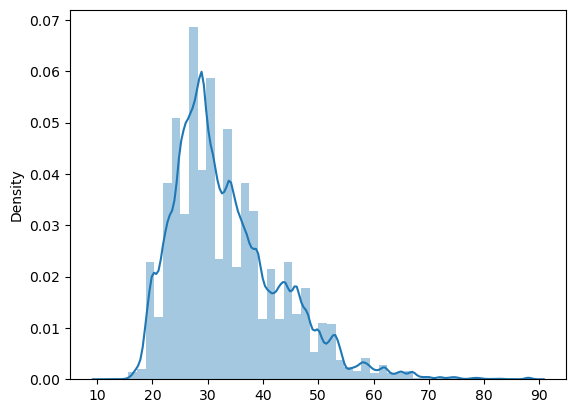

In [38]:
sns.distplot(df, x = df['age'])

In [41]:
skewness = df.apply(pd.to_numeric, errors='coerce').skew()
skewness

gender               NaN
age             1.085327
group                NaN
event_id       -0.000999
timestamp            NaN
longitude      -0.771811
latitude       -0.466546
phone_brand          NaN
device_model   -0.311244
dtype: float64

The data seems to be moderately skewed, we will address this issue later by normalising the values.

In [42]:
import math

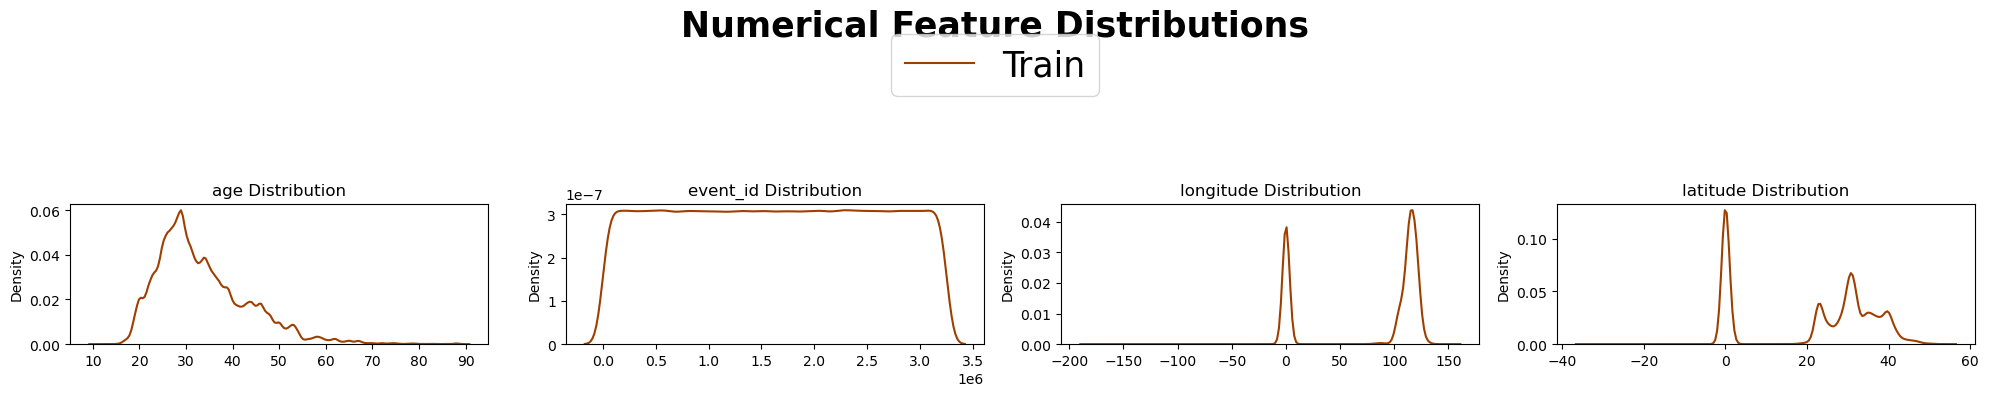

In [43]:
features = numerical_columns
n_bins = 50
histplot_hyperparams = {
    'kde':True,
    'alpha':0.4,
    'stat':'percent',
    'bins':n_bins
}

columns = features
n_cols = 4
n_rows = math.ceil(len(columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
ax = ax.flatten()

for i, column in enumerate(columns):
    plot_axes = [ax[i]]
    sns.kdeplot(
        df[column], label='Train',
        ax=ax[i], color='#9E3F00'
    )
    
   
    
#     sns.kdeplot(
#         original[column], label='Original',
#         ax=ax[i], color='#20BEFF'
#     )
    
    # titles
    ax[i].set_title(f'{column} Distribution');
    ax[i].set_xlabel(None)
    
    # remove axes to show only one at the end
    plot_axes = [ax[i]]
    handles = []
    labels = []
    for plot_ax in plot_axes:
        handles += plot_ax.get_legend_handles_labels()[0]
        labels += plot_ax.get_legend_handles_labels()[1]
        plot_ax.legend().remove()
    
for i in range(i+1, len(ax)):
    ax[i].axis('off')
    
fig.suptitle(f'Numerical Feature Distributions\n\n\n', ha='center',  fontweight='bold', fontsize=25)
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.96), fontsize=25, ncol=3)
plt.tight_layout()

In [50]:
def plot_correlation_heatmap(df: pd.core.frame.DataFrame, title_name: str='Train correlation') -> None:
    # Convert non-numeric values to NaN
    df_numeric = df.apply(pd.to_numeric, errors='coerce')

    # Calculate correlation matrix
    corr = df_numeric.corr()
    corr

    # Create a mask for the upper triangle
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap
    fig, axes = plt.subplots(figsize=(20, 10))
    sns.heatmap(corr, mask=mask, linewidths=.5, cmap='YlOrRd', annot=True)
    plt.title(title_name)
    plt.show()
    plt

Correlation Heatmap 

## Checking outliers

In [51]:
##defining the categorical variables
categorical_features = [feature for feature in df.columns if df[feature].dtypes =='O']
categorical_features

['gender', 'group', 'timestamp', 'phone_brand', 'device_model']

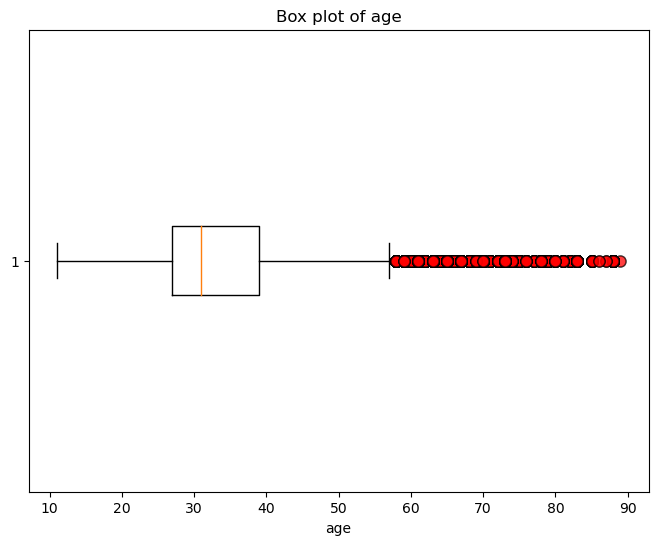

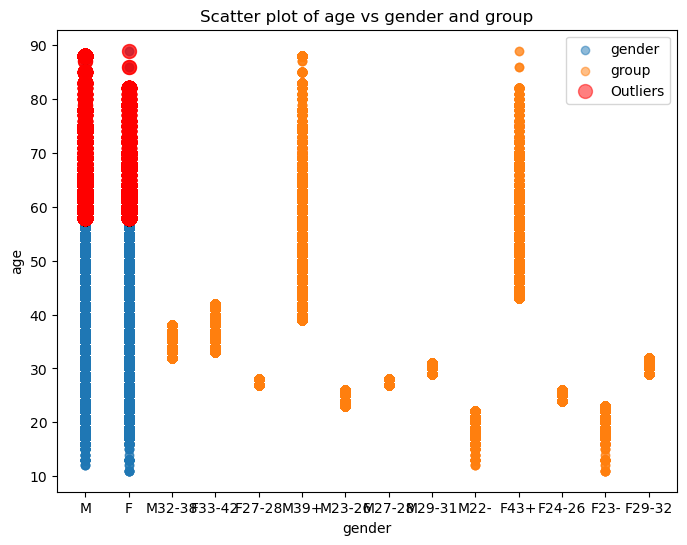

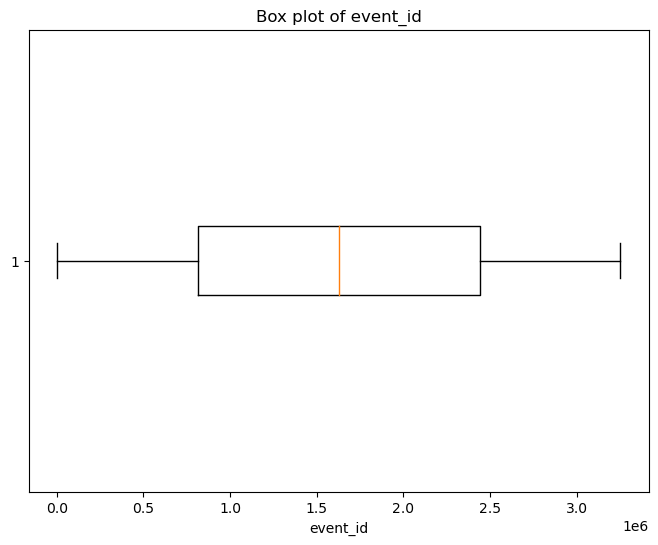

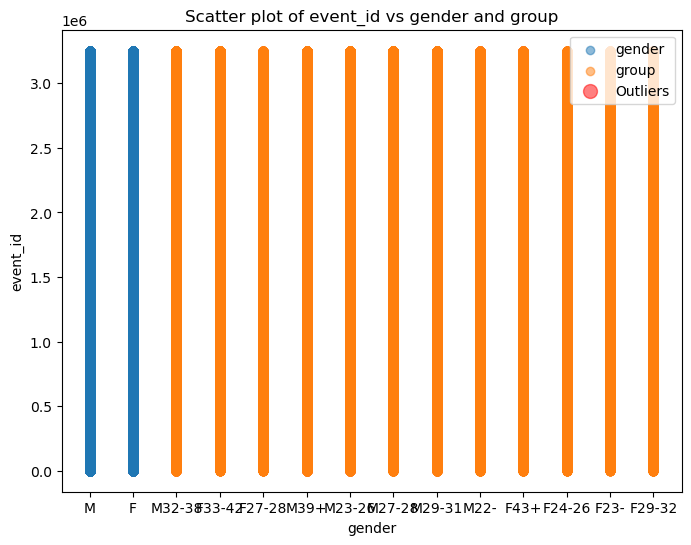

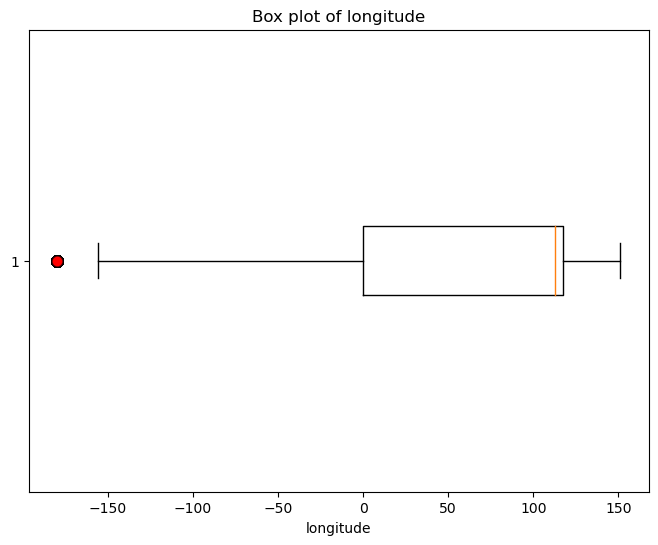

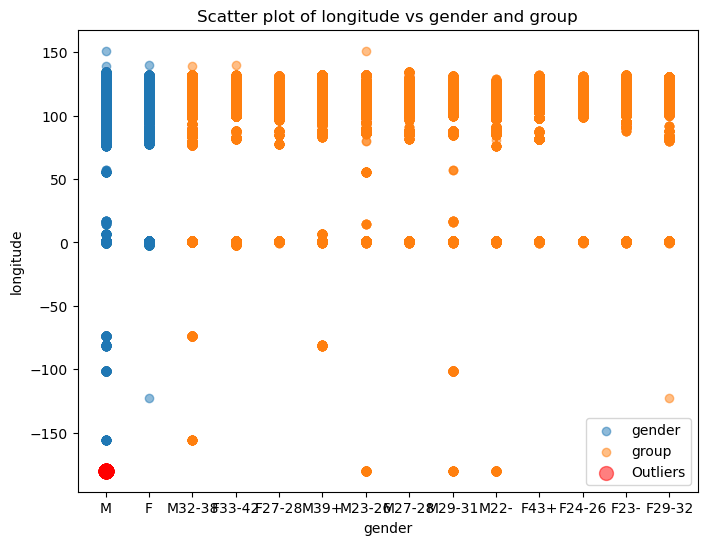

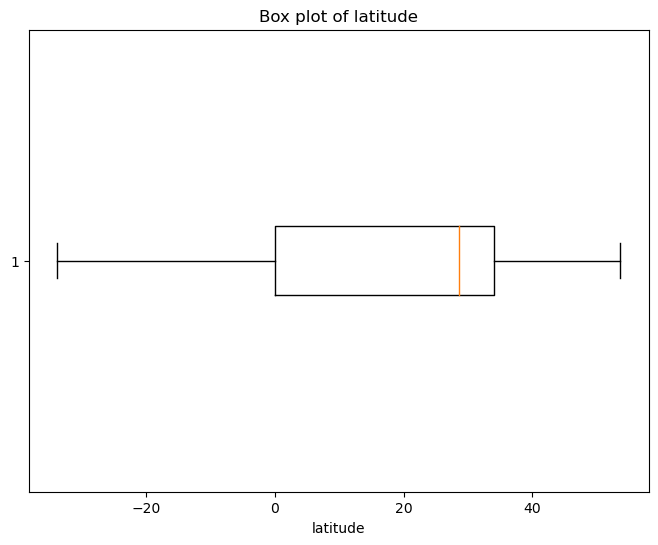

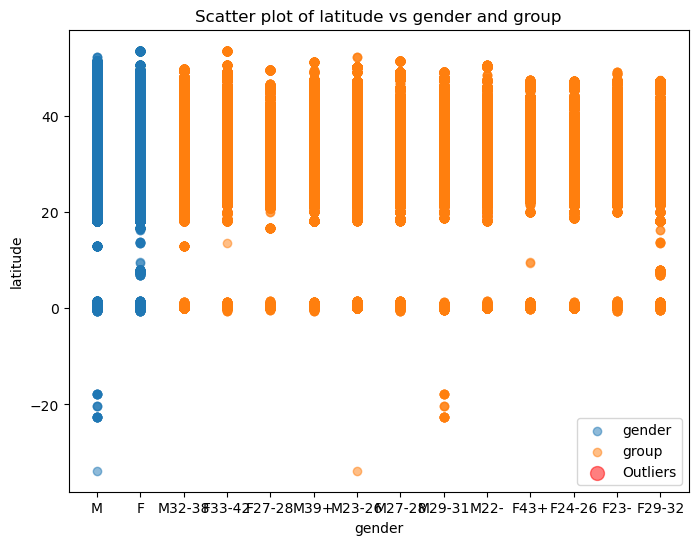

In [52]:
# Loop through the numerical features
for feature in numerical_columns:
    
    # Calculate the quartiles and interquartile range
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    
    # Calculate the upper and lower bounds for outliers
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    
    # Find the outliers
    outliers = df[(df[feature] > upper_bound) | (df[feature] < lower_bound)]
    
    # Plot the box plot with outliers
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[feature], vert=False, flierprops=dict(marker='o', markersize=8, markerfacecolor='red', alpha=0.5))
    plt.title('Box plot of {}'.format(feature))
    plt.xlabel(feature)
    plt.show()
    
    # Plot the scatter plot with outliers
    plt.figure(figsize=(8, 6))
    plt.scatter(df[categorical_features[0]], df[feature], alpha=0.5, label=categorical_features[0])
    plt.scatter(df[categorical_features[1]], df[feature], alpha=0.5, label=categorical_features[1])
    plt.scatter(outliers[categorical_features[0]], outliers[feature], color='red', marker='o', s=100, alpha=0.5, label='Outliers')
    plt.title('Scatter plot of {} vs {} and {}'.format(feature, categorical_features[0], categorical_features[1]))
    plt.xlabel('{}'.format(categorical_features[0]))
    plt.ylabel('{}'.format(feature))
    plt.legend()
    plt.show()


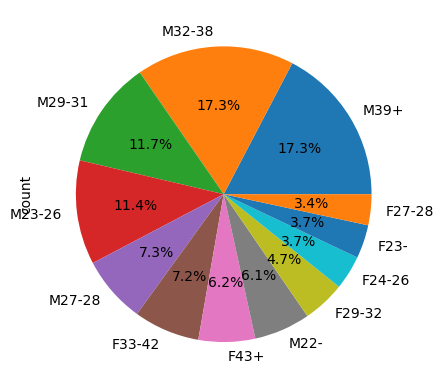

<Figure size 600x600 with 0 Axes>

In [53]:
# Create a pie chart
df['group'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.figure(figsize = (6,6))
plt.show()


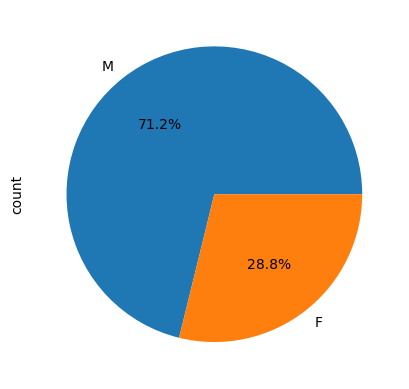

<Figure size 800x800 with 0 Axes>

In [54]:
# Create a pie chart
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.figure(figsize = (8,8))
plt.show()


## Feature Engineering

Encoding the categorical features

In [55]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to the categorical feature and transform the values
encoded_values = label_encoder.fit_transform(df['phone_brand'])

# Add the encoded values as a new column to the DataFrame
df['phone_brand'] = encoded_values

# Print the encoded DataFrame
print(df)

        gender  age   group  event_id            timestamp  longitude  \
0            M   35  M32-38   2479656  2016-05-01 14:23:37       0.00   
1            F   37  F33-42    280934  2016-05-04 14:10:03     119.57   
2            F   37  F33-42    363585  2016-05-04 14:13:30     119.57   
3            F   37  F33-42    935225  2016-05-06 18:51:15       0.00   
4            F   37  F33-42   1551108  2016-05-04 14:09:29     119.57   
...        ...  ...     ...       ...                  ...        ...   
1220469      M   25  M23-26   2218742  2016-05-05 19:28:40       0.00   
1220470      M   25  M23-26   2243803  2016-05-06 17:12:46       0.00   
1220471      M   25  M23-26   2336186  2016-05-04 14:08:05     119.26   
1220472      M   25  M23-26   3139128  2016-05-04 14:08:35     119.26   
1220473      M   25  M23-26   3176234  2016-05-06 17:15:32       0.00   

         latitude  phone_brand device_model  
0            0.00           34         MI 2  
1           31.75           21 

In [56]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to the categorical feature and transform the values
encoded_values = label_encoder.fit_transform(df['phone_brand'])

# Add the encoded values as a new column to the DataFrame
df['device_model'] = encoded_values

# Print the encoded DataFrame
print(df)

        gender  age   group  event_id            timestamp  longitude  \
0            M   35  M32-38   2479656  2016-05-01 14:23:37       0.00   
1            F   37  F33-42    280934  2016-05-04 14:10:03     119.57   
2            F   37  F33-42    363585  2016-05-04 14:13:30     119.57   
3            F   37  F33-42    935225  2016-05-06 18:51:15       0.00   
4            F   37  F33-42   1551108  2016-05-04 14:09:29     119.57   
...        ...  ...     ...       ...                  ...        ...   
1220469      M   25  M23-26   2218742  2016-05-05 19:28:40       0.00   
1220470      M   25  M23-26   2243803  2016-05-06 17:12:46       0.00   
1220471      M   25  M23-26   2336186  2016-05-04 14:08:05     119.26   
1220472      M   25  M23-26   3139128  2016-05-04 14:08:35     119.26   
1220473      M   25  M23-26   3176234  2016-05-06 17:15:32       0.00   

         latitude  phone_brand  device_model  
0            0.00           34            34  
1           31.75           2

In [57]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to the categorical feature and transform the values
encoded_values = label_encoder.fit_transform(df['phone_brand'])

# Add the encoded values as a new column to the DataFrame
df['gender'] = encoded_values

# Print the encoded DataFrame
print(df)

         gender  age   group  event_id            timestamp  longitude  \
0            34   35  M32-38   2479656  2016-05-01 14:23:37       0.00   
1            21   37  F33-42    280934  2016-05-04 14:10:03     119.57   
2            21   37  F33-42    363585  2016-05-04 14:13:30     119.57   
3            21   37  F33-42    935225  2016-05-06 18:51:15       0.00   
4            21   37  F33-42   1551108  2016-05-04 14:09:29     119.57   
...         ...  ...     ...       ...                  ...        ...   
1220469      34   25  M23-26   2218742  2016-05-05 19:28:40       0.00   
1220470      34   25  M23-26   2243803  2016-05-06 17:12:46       0.00   
1220471      34   25  M23-26   2336186  2016-05-04 14:08:05     119.26   
1220472      34   25  M23-26   3139128  2016-05-04 14:08:35     119.26   
1220473      34   25  M23-26   3176234  2016-05-06 17:15:32       0.00   

         latitude  phone_brand  device_model  
0            0.00           34            34  
1           31.75

In [58]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to the categorical feature and transform the values
encoded_values = label_encoder.fit_transform(df['phone_brand'])

# Add the encoded values as a new column to the DataFrame
df['group'] = encoded_values

# Print the encoded DataFrame
print(df)

         gender  age  group  event_id            timestamp  longitude  \
0            34   35     34   2479656  2016-05-01 14:23:37       0.00   
1            21   37     21    280934  2016-05-04 14:10:03     119.57   
2            21   37     21    363585  2016-05-04 14:13:30     119.57   
3            21   37     21    935225  2016-05-06 18:51:15       0.00   
4            21   37     21   1551108  2016-05-04 14:09:29     119.57   
...         ...  ...    ...       ...                  ...        ...   
1220469      34   25     34   2218742  2016-05-05 19:28:40       0.00   
1220470      34   25     34   2243803  2016-05-06 17:12:46       0.00   
1220471      34   25     34   2336186  2016-05-04 14:08:05     119.26   
1220472      34   25     34   3139128  2016-05-04 14:08:35     119.26   
1220473      34   25     34   3176234  2016-05-06 17:15:32       0.00   

         latitude  phone_brand  device_model  
0            0.00           34            34  
1           31.75           2

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220474 entries, 0 to 1220473
Data columns (total 9 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   gender        1220474 non-null  int64  
 1   age           1220474 non-null  int64  
 2   group         1220474 non-null  int64  
 3   event_id      1220474 non-null  int64  
 4   timestamp     1220474 non-null  object 
 5   longitude     1220474 non-null  float64
 6   latitude      1220474 non-null  float64
 7   phone_brand   1220474 non-null  int64  
 8   device_model  1220474 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 83.8+ MB


In [69]:
df.head(10)

gender  age  group  longitude  latitude  phone_brand  device_model
0      34   35     34       0.00      0.00           34            34
1      21   37     21     119.57     31.75           21            21
2      21   37     21     119.57     31.75           21            21
3      21   37     21       0.00      0.00           21            21
4      21   37     21     119.57     31.75           21            21
5      21   37     21     119.57     31.75           21            21
6      21   37     21     119.59     31.75           21            21
7      21   37     21     119.57     31.75           21            21
8      21   32     21       0.00      0.00           21            21
9      21   32     21       0.00      0.00           21            21

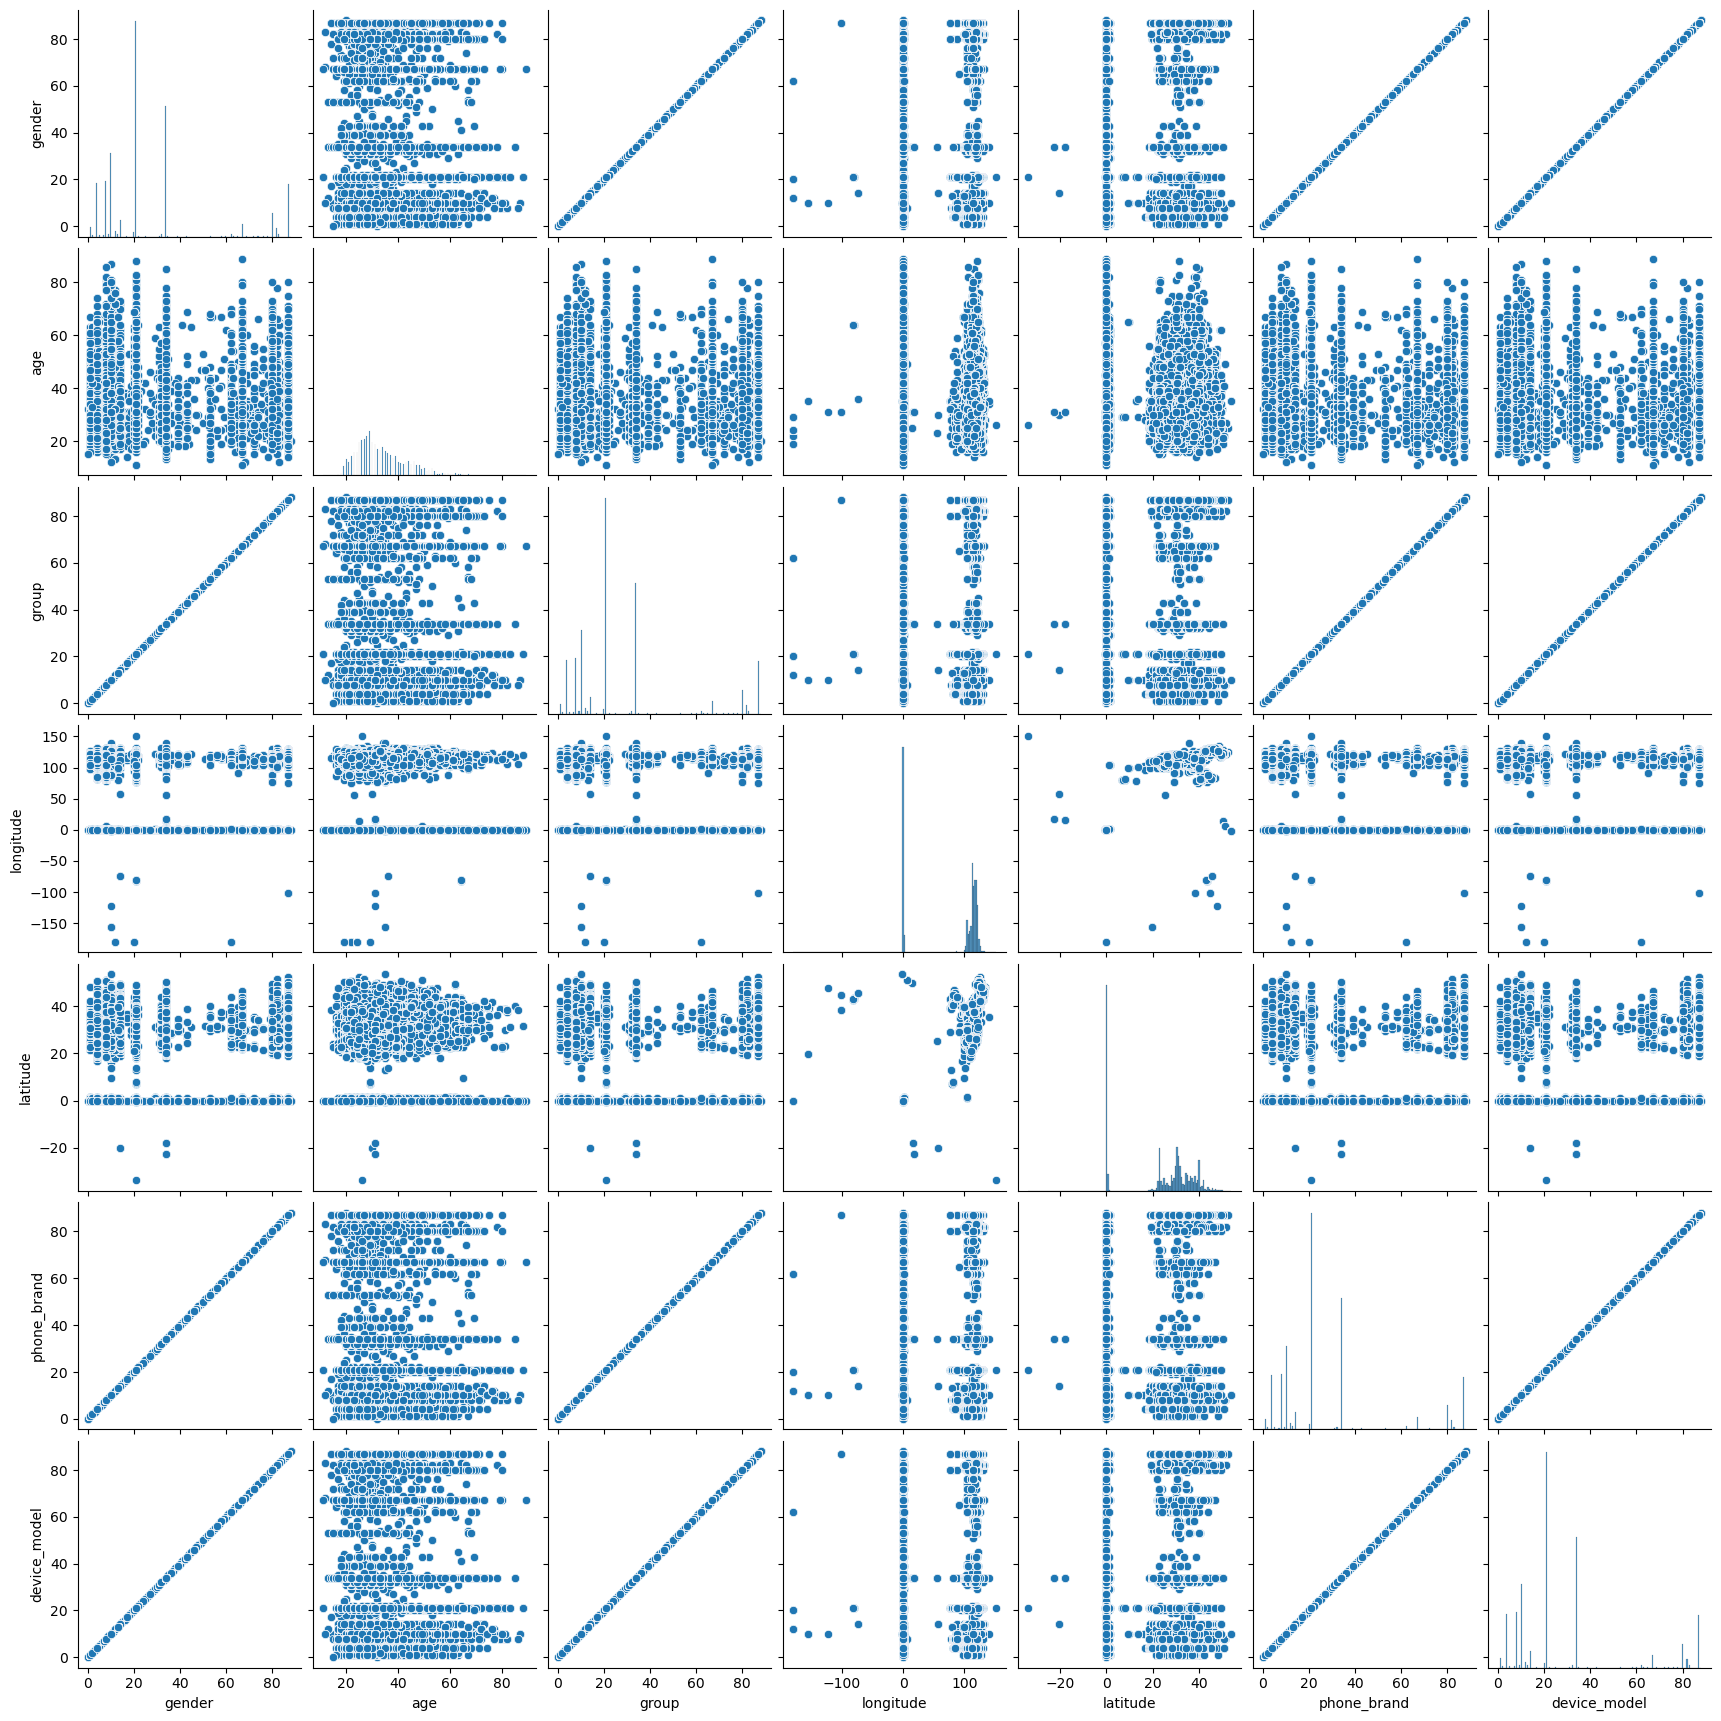

In [70]:
sns.pairplot(df)

## Scaling the Data

In [71]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()



In [72]:
sc.fit(df)
scaled = sc.transform(df)
scaled

array([[ 0.22904409,  0.15541439,  0.22904409, ..., -1.39548323,
         0.22904409,  0.22904409],
       [-0.30082062,  0.36078439, -0.30082062, ...,  0.63374283,
        -0.30082062, -0.30082062],
       [-0.30082062,  0.36078439, -0.30082062, ...,  0.63374283,
        -0.30082062, -0.30082062],
       ...,
       [ 0.22904409, -0.87143562,  0.22904409, ...,  0.26944083,
         0.22904409,  0.22904409],
       [ 0.22904409, -0.87143562,  0.22904409, ...,  0.26944083,
         0.22904409,  0.22904409],
       [ 0.22904409, -0.87143562,  0.22904409, ..., -1.39548323,
         0.22904409,  0.22904409]])

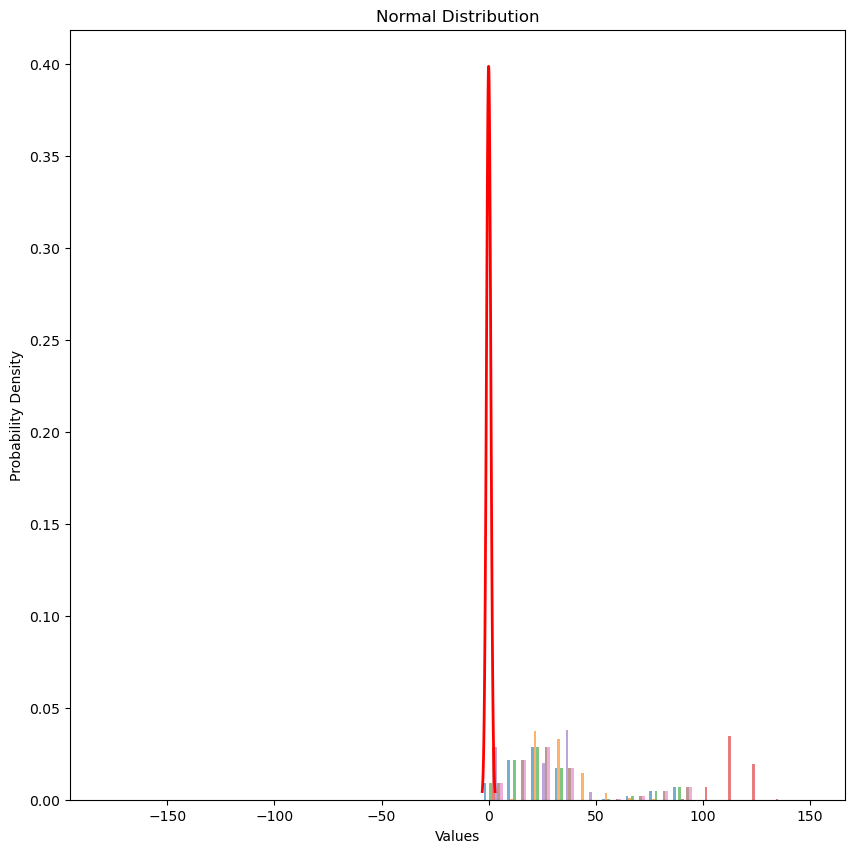

In [73]:
##plotting default values on a normal curve
## lets check the distribution of the numerical values

plt.figure(figsize=(10,10))
plt.hist(df, bins=30, density=True, alpha=0.6)

# Plot the probability density function
x = np.linspace(-3, 3, 100)
y = 1/(np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)
plt.plot(x, y, color='r', linewidth=2)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.title('Normal Distribution')

# Show the plot
plt.show()


## Plotting Scaled values 

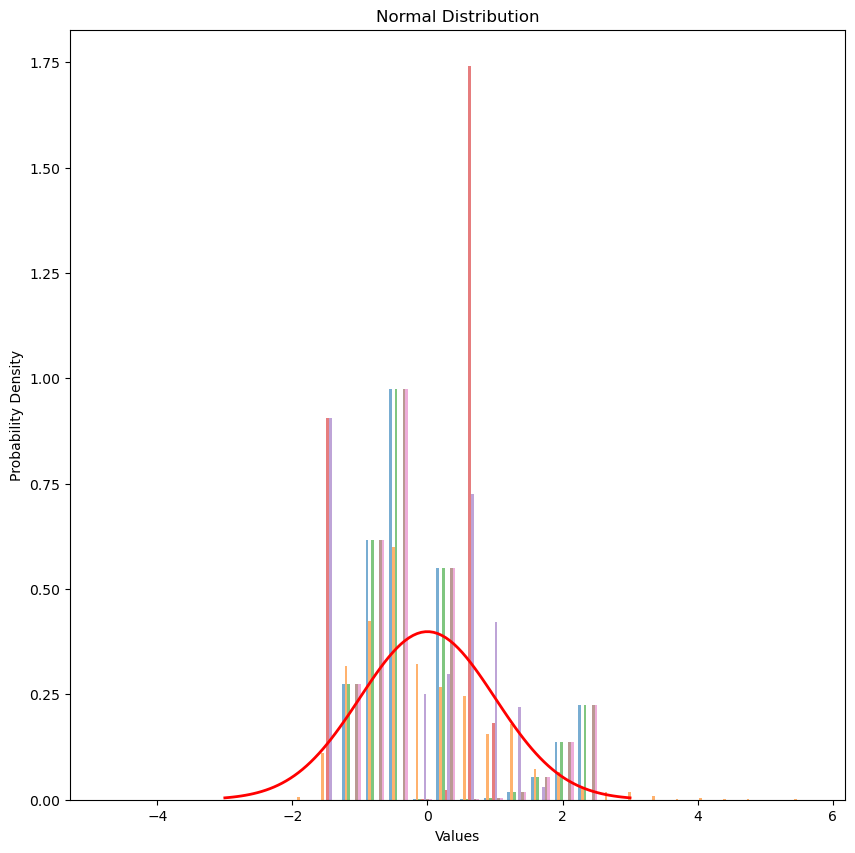

In [74]:
##plotting the scaled values on a normal curve
## lets check the distribution of the numerical values

plt.figure(figsize=(10,10))
plt.hist(scaled, bins=30, density=True, alpha=0.6)

# Plot the probability density function
x = np.linspace(-3, 3, 100)
y = 1/(np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)
plt.plot(x, y, color='r', linewidth=2)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.title('Normal Distribution')

# Show the plot
plt.show()


In [75]:
df.head()

gender  age  group  longitude  latitude  phone_brand  device_model
0      34   35     34       0.00      0.00           34            34
1      21   37     21     119.57     31.75           21            21
2      21   37     21     119.57     31.75           21            21
3      21   37     21       0.00      0.00           21            21
4      21   37     21     119.57     31.75           21            21

In [76]:
df = pd.DataFrame(scaled, columns=df.columns)
df.head(10)

gender       age     group  longitude  latitude  phone_brand  \
0  0.229044  0.155414  0.229044  -1.457102 -1.395483     0.229044   
1 -0.300821  0.360784 -0.300821   0.764863  0.633743    -0.300821   
2 -0.300821  0.360784 -0.300821   0.764863  0.633743    -0.300821   
3 -0.300821  0.360784 -0.300821  -1.457102 -1.395483    -0.300821   
4 -0.300821  0.360784 -0.300821   0.764863  0.633743    -0.300821   
5 -0.300821  0.360784 -0.300821   0.764863  0.633743    -0.300821   
6 -0.300821  0.360784 -0.300821   0.765234  0.633743    -0.300821   
7 -0.300821  0.360784 -0.300821   0.764863  0.633743    -0.300821   
8 -0.300821 -0.152641 -0.300821  -1.457102 -1.395483    -0.300821   
9 -0.300821 -0.152641 -0.300821  -1.457102 -1.395483    -0.300821   

   device_model  
0      0.229044  
1     -0.300821  
2     -0.300821  
3     -0.300821  
4     -0.300821  
5     -0.300821  
6     -0.300821  
7     -0.300821  
8     -0.300821  
9     -0.300821

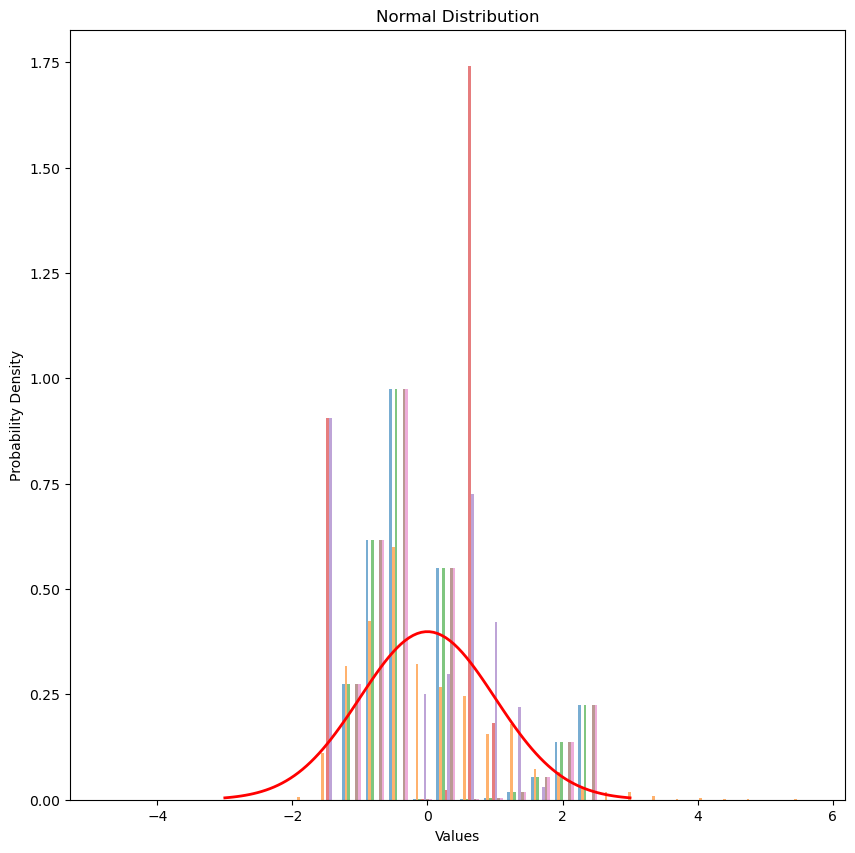

In [77]:
##plotting the scaled values on a normal curve
## lets check the distribution of the numerical values

plt.figure(figsize=(10,10))
plt.hist(df, bins=30, density=True, alpha=0.6)

# Plot the probability density function
x = np.linspace(-3, 3, 100)
y = 1/(np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)
plt.plot(x, y, color='r', linewidth=2)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.title('Normal Distribution')

# Show the plot
plt.show()


In [78]:
df.shape

(1220474, 7)

In [79]:
df.head(10)

gender       age     group  longitude  latitude  phone_brand  \
0  0.229044  0.155414  0.229044  -1.457102 -1.395483     0.229044   
1 -0.300821  0.360784 -0.300821   0.764863  0.633743    -0.300821   
2 -0.300821  0.360784 -0.300821   0.764863  0.633743    -0.300821   
3 -0.300821  0.360784 -0.300821  -1.457102 -1.395483    -0.300821   
4 -0.300821  0.360784 -0.300821   0.764863  0.633743    -0.300821   
5 -0.300821  0.360784 -0.300821   0.764863  0.633743    -0.300821   
6 -0.300821  0.360784 -0.300821   0.765234  0.633743    -0.300821   
7 -0.300821  0.360784 -0.300821   0.764863  0.633743    -0.300821   
8 -0.300821 -0.152641 -0.300821  -1.457102 -1.395483    -0.300821   
9 -0.300821 -0.152641 -0.300821  -1.457102 -1.395483    -0.300821   

   device_model  
0      0.229044  
1     -0.300821  
2     -0.300821  
3     -0.300821  
4     -0.300821  
5     -0.300821  
6     -0.300821  
7     -0.300821  
8     -0.300821  
9     -0.300821

## Performing Principal Component Analysis

The data has been standardised. 
Lets generate a covariance matrix

In [80]:
cov_matrix = df.cov()
print(cov_matrix)

                gender       age     group  longitude  latitude  phone_brand  \
gender        1.000001 -0.001189  1.000001  -0.087553 -0.089948     1.000001   
age          -0.001189  1.000001 -0.001189   0.003963  0.024463    -0.001189   
group         1.000001 -0.001189  1.000001  -0.087553 -0.089948     1.000001   
longitude    -0.087553  0.003963 -0.087553   1.000001  0.949329    -0.087553   
latitude     -0.089948  0.024463 -0.089948   0.949329  1.000001    -0.089948   
phone_brand   1.000001 -0.001189  1.000001  -0.087553 -0.089948     1.000001   
device_model  1.000001 -0.001189  1.000001  -0.087553 -0.089948     1.000001   

              device_model  
gender            1.000001  
age              -0.001189  
group             1.000001  
longitude        -0.087553  
latitude         -0.089948  
phone_brand       1.000001  
device_model      1.000001  


## Based on the correlation matrix, it seems that longitude and latitude are strongly correlated with each other, as well as phone_brand and gender. 

## it may be better to remove one of the correlated features to avoid redundancy and simplify the model.

In [81]:
df = df.drop('phone_brand', axis=1)

In [82]:
df.head()

gender       age     group  longitude  latitude  device_model
0  0.229044  0.155414  0.229044  -1.457102 -1.395483      0.229044
1 -0.300821  0.360784 -0.300821   0.764863  0.633743     -0.300821
2 -0.300821  0.360784 -0.300821   0.764863  0.633743     -0.300821
3 -0.300821  0.360784 -0.300821  -1.457102 -1.395483     -0.300821
4 -0.300821  0.360784 -0.300821   0.764863  0.633743     -0.300821

In [83]:
## new cov_matrix
cov_matrix = df.cov()
print(cov_matrix)

                gender       age     group  longitude  latitude  device_model
gender        1.000001 -0.001189  1.000001  -0.087553 -0.089948      1.000001
age          -0.001189  1.000001 -0.001189   0.003963  0.024463     -0.001189
group         1.000001 -0.001189  1.000001  -0.087553 -0.089948      1.000001
longitude    -0.087553  0.003963 -0.087553   1.000001  0.949329     -0.087553
latitude     -0.089948  0.024463 -0.089948   0.949329  1.000001     -0.089948
device_model  1.000001 -0.001189  1.000001  -0.087553 -0.089948      1.000001


In [84]:
##Eigen decomposition

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Print the results
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)


Eigenvalues: [ 3.04322682e+00  1.90653668e+00  9.99793497e-01  5.04479217e-02
 -3.21999055e-16  2.15520260e-17]
Eigenvectors: [[ 5.66267440e-01 -1.12577248e-01  7.39342216e-04 -5.79707592e-04
  -8.16424370e-01  5.42877793e-02]
 [-2.91320632e-03 -2.12972864e-02 -9.99652357e-01  1.52677102e-02
  -1.81045392e-16  3.46106999e-18]
 [ 5.66267440e-01 -1.12577248e-01  7.39342216e-04 -5.79707592e-04
   4.17616213e-01 -7.32685970e-01]
 [-1.37176327e-01 -6.93470865e-01  2.59693500e-02  7.06828414e-01
   2.47475509e-16 -1.20073397e-16]
 [-1.38555861e-01 -6.93270275e-01  4.37231438e-03 -7.07219543e-01
  -1.16906727e-16  2.96053260e-16]
 [ 5.66267440e-01 -1.12577248e-01  7.39342216e-04 -5.79707592e-04
   3.98808158e-01  6.78398191e-01]]


In [85]:
# Sort the eigenvalues in descending order and get the corresponding indices
eigenvalues_sorted_indices = np.argsort(eigenvalues)[::-1]

# Sort the eigenvectors according to the sorted eigenvalues
eigenvectors_sorted = eigenvectors[:,eigenvalues_sorted_indices]


In [86]:
eigenvalues_sorted_indices


array([0, 1, 2, 3, 5, 4])

In [87]:
eigenvectors_sorted

array([[ 5.66267440e-01, -1.12577248e-01,  7.39342216e-04,
        -5.79707592e-04,  5.42877793e-02, -8.16424370e-01],
       [-2.91320632e-03, -2.12972864e-02, -9.99652357e-01,
         1.52677102e-02,  3.46106999e-18, -1.81045392e-16],
       [ 5.66267440e-01, -1.12577248e-01,  7.39342216e-04,
        -5.79707592e-04, -7.32685970e-01,  4.17616213e-01],
       [-1.37176327e-01, -6.93470865e-01,  2.59693500e-02,
         7.06828414e-01, -1.20073397e-16,  2.47475509e-16],
       [-1.38555861e-01, -6.93270275e-01,  4.37231438e-03,
        -7.07219543e-01,  2.96053260e-16, -1.16906727e-16],
       [ 5.66267440e-01, -1.12577248e-01,  7.39342216e-04,
        -5.79707592e-04,  6.78398191e-01,  3.98808158e-01]])

## Variance captured by eigen decomp

In [88]:
total = sum(eigenvalues)
var_exp = [ (i/total) *100 for i in sorted(eigenvalues, reverse=True) ]
cum_var_exp = np.cumsum(var_exp)
print('Variance Explained: ' , var_exp)
print( 'Cummulative Variance Explained: ',cum_var_exp)

Variance Explained:  [50.72040544254315, 31.775585255466872, 16.663211296599926, 0.8407980053900542, 3.59200138345015e-16, -5.36664651513133e-15]
Cummulative Variance Explained:  [ 50.72040544  82.4959907   99.15920199 100.         100.
 100.        ]


## This shows that if we take 1st feature it incorporates 50 percent of the values, the second does 31 % and third does 16 %. If we take 3 features it will capture 97-98 % of the dataset.

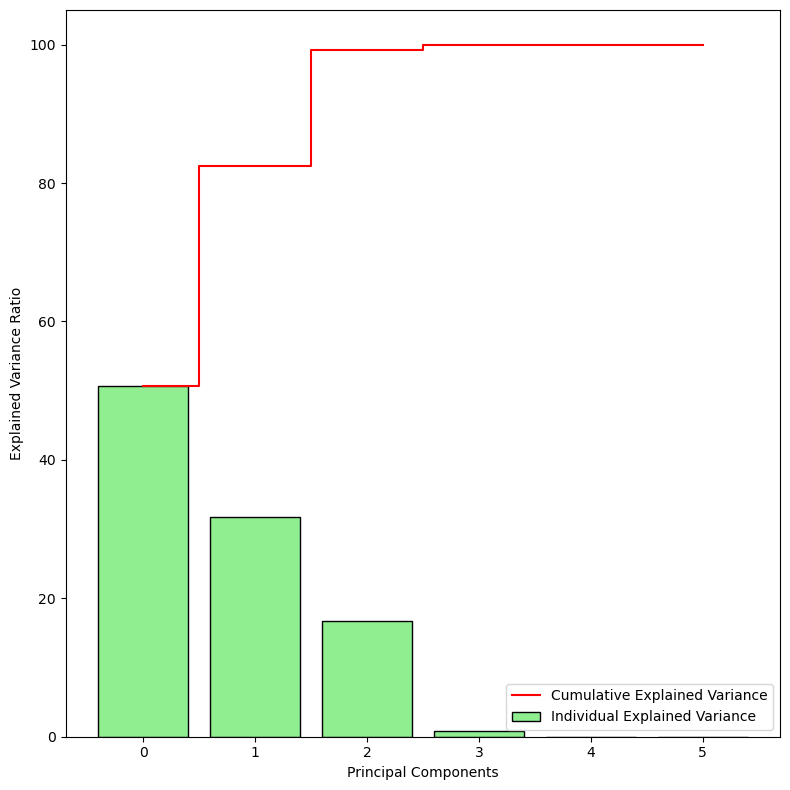

In [89]:
plt.figure(figsize= (8,8))
plt.bar(range(6), var_exp, align='center', color='lightgreen', edgecolor='black', label='Individual Explained Variance')
plt.step(range(6), cum_var_exp, where='mid', color='red', label='Cumulative Explained Variance')
plt.legend(loc='best')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.tight_layout()
plt.show()


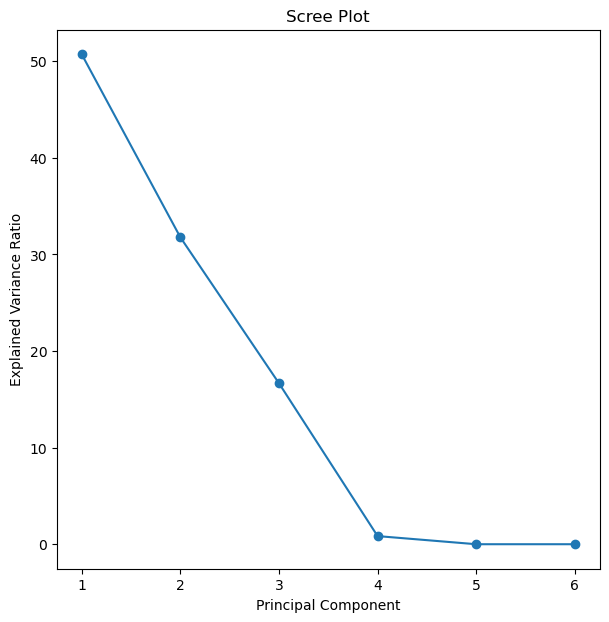

In [90]:
# Calculate cumulative explained variance
cumulative_var_exp = np.cumsum(var_exp)

# Plot scree plot
plt.figure(figsize= (7,7))
plt.plot(range(1, len(var_exp)+1), var_exp, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(var_exp)+1))
plt.show()


## The scree plot tells that optimal features obtained are 4

In [91]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(scaled)
X_pca = pca.transform(scaled)
feature_names = df.columns.tolist()

In [92]:
X_pca.shape

(1220474, 4)

In [93]:
X_pca

array([[ 0.69610499,  1.94390274,  0.19878456,  0.04103312],
       [-0.71625308, -0.91727076,  0.33864982, -0.0984611 ],
       [-0.71625308, -0.91727076,  0.33864982, -0.0984611 ],
       ...,
       [ 0.36934714, -0.75813556, -0.89245103, -0.33229994],
       [ 0.36934714, -0.75813556, -0.89245103, -0.33229994],
       [ 0.69772472,  1.96586532, -0.82770955,  0.05671077]])

<Figure size 700x700 with 0 Axes>

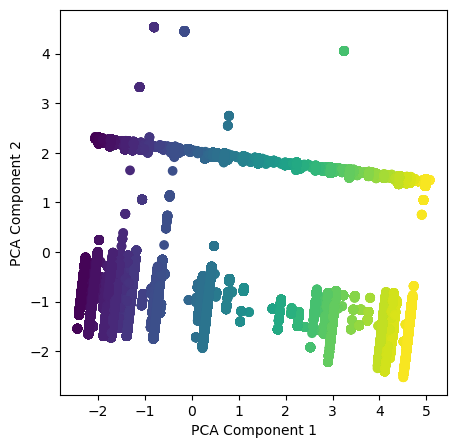

In [94]:
##Plotting the distribution
plt.figure(figsize= (7,7))
plt.figure(figsize = (5,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1],c=df["device_model"])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

## Performing K means clustering

In [95]:
df.shape

(1220474, 6)

In [96]:
df.head()

gender       age     group  longitude  latitude  device_model
0  0.229044  0.155414  0.229044  -1.457102 -1.395483      0.229044
1 -0.300821  0.360784 -0.300821   0.764863  0.633743     -0.300821
2 -0.300821  0.360784 -0.300821   0.764863  0.633743     -0.300821
3 -0.300821  0.360784 -0.300821  -1.457102 -1.395483     -0.300821
4 -0.300821  0.360784 -0.300821   0.764863  0.633743     -0.300821

WCSS- within clusters sum of sqaure

In [97]:
from sklearn.cluster import KMeans

In [98]:
X = df.iloc[:, [5]].values

In [99]:
X

array([[ 0.22904409],
       [-0.30082062],
       [-0.30082062],
       ...,
       [ 0.22904409],
       [ 0.22904409],
       [ 0.22904409]])

In [100]:
X.shape

(1220474, 1)

In [101]:
wcss = []
for i in range (1,4):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

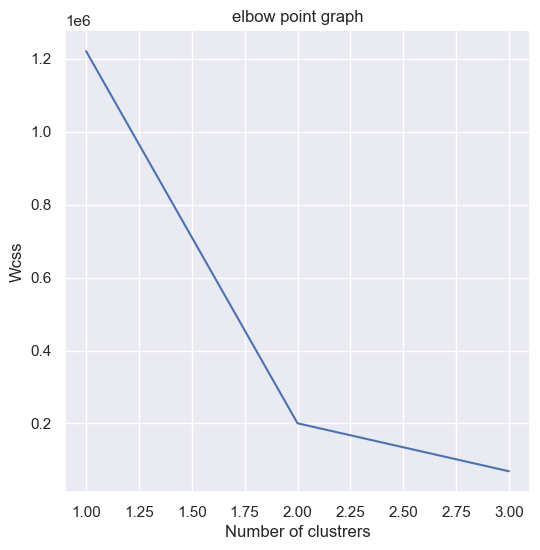

In [102]:
sns.set()
plt.figure(figsize = (6,6))
plt.plot(range(1,4),wcss)
plt.title("elbow point graph")
plt.xlabel("Number of clustrers")
plt.ylabel("Wcss")
plt.show()

## Elbow plot shows 2 columns to be optimal choice

In [103]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0)


#return a label for each data point based on their cluster

Y = kmeans.fit_predict(X)
print(len(Y))

1220474


In [104]:
Y

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

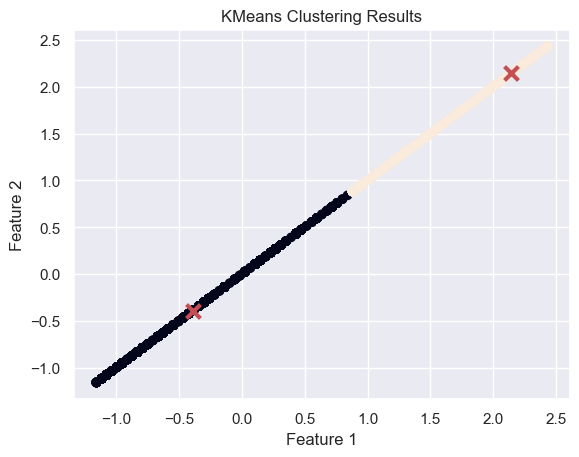

In [105]:
import matplotlib.pyplot as plt

# X is your data
# Y is the cluster labels assigned by KMeans

# plot the data points with colors based on their cluster labels
plt.scatter(X[:, 0], X[:, 0], c=Y)

# plot the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 0], marker='x', s=100, linewidths=3, color='r')

# set the axis labels and title

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering Results')

# show the plot
plt.show()


## Performing Agglomerative clustering

In [106]:
df.head(10)

gender       age     group  longitude  latitude  device_model
0  0.229044  0.155414  0.229044  -1.457102 -1.395483      0.229044
1 -0.300821  0.360784 -0.300821   0.764863  0.633743     -0.300821
2 -0.300821  0.360784 -0.300821   0.764863  0.633743     -0.300821
3 -0.300821  0.360784 -0.300821  -1.457102 -1.395483     -0.300821
4 -0.300821  0.360784 -0.300821   0.764863  0.633743     -0.300821
5 -0.300821  0.360784 -0.300821   0.764863  0.633743     -0.300821
6 -0.300821  0.360784 -0.300821   0.765234  0.633743     -0.300821
7 -0.300821  0.360784 -0.300821   0.764863  0.633743     -0.300821
8 -0.300821 -0.152641 -0.300821  -1.457102 -1.395483     -0.300821
9 -0.300821 -0.152641 -0.300821  -1.457102 -1.395483     -0.300821

## We need to reduce the data's dimension as 1.2 million records require too much computation power and memory. So we take a reduced random sample size

In [107]:
np.random.seed(42)

# Randomly select 10000 samples from the dataset
subset_df = df.sample(n=1000)

In [108]:
subset_df.shape

(1000, 6)

In [109]:
R = subset_df.iloc[:, [5]].values

In [110]:
R

array([[-0.74916769],
       [-0.83068534],
       [ 0.22904409],
       [-0.74916769],
       [-0.30082062],
       [ 0.22904409],
       [ 0.22904409],
       [-0.99372063],
       [-0.30082062],
       [-0.34157945],
       [-0.74916769],
       [-0.30082062],
       [-0.30082062],
       [-0.30082062],
       [ 0.22904409],
       [ 2.18546765],
       [ 0.22904409],
       [-0.99372063],
       [ 0.22904409],
       [-0.30082062],
       [ 2.38926177],
       [-0.30082062],
       [ 1.57408529],
       [ 2.38926177],
       [-0.74916769],
       [ 0.22904409],
       [-0.74916769],
       [-0.30082062],
       [ 0.22904409],
       [-0.30082062],
       [-0.74916769],
       [ 2.10395   ],
       [-0.74916769],
       [ 0.22904409],
       [-0.30082062],
       [-0.99372063],
       [ 0.22904409],
       [ 2.10395   ],
       [-0.30082062],
       [-0.58613239],
       [-0.83068534],
       [-0.30082062],
       [-0.66765004],
       [ 0.22904409],
       [-0.99372063],
       [ 2

In [111]:
R.shape

(1000, 1)

## Since the Silhouette score of 4 cluster is the highest, lets build a dendrogam of 4 clusters

In [113]:
from sklearn.cluster import AgglomerativeClustering



# Create an Agglomerative Clustering object with n clusters
n_clusters = 4
clusterer = AgglomerativeClustering(n_clusters=n_clusters)

# Fit the clustering object to the data
cluster_labels = clusterer.fit_predict(R)

# Print the cluster labels for each data point
print("Cluster labels:", cluster_labels)


Cluster labels: [2 2 1 2 3 1 1 2 3 3 2 3 3 3 1 0 1 2 1 3 0 3 0 0 2 1 2 3 1 3 2 0 2 1 3 2 1
 0 3 2 2 3 2 1 2 0 1 2 0 3 2 0 1 3 3 2 0 0 3 2 3 3 3 0 0 2 0 3 0 0 0 1 3 2
 0 0 3 1 2 3 2 1 2 0 2 2 2 2 3 3 1 2 1 2 3 2 0 2 0 2 2 2 3 0 2 1 1 1 1 0 0
 1 0 1 3 0 0 0 1 3 3 2 3 1 2 3 1 2 1 2 1 1 0 0 1 1 2 1 3 2 3 3 3 3 3 0 0 1
 3 3 3 3 2 3 2 3 0 3 1 2 3 3 1 2 3 0 1 2 0 1 2 1 1 3 0 3 3 2 3 0 2 3 1 2 0
 2 2 2 2 2 1 0 2 3 0 2 3 3 3 3 3 3 1 3 0 3 3 3 2 2 2 0 3 3 3 3 2 2 3 3 2 2
 1 3 0 2 3 0 1 2 2 3 1 2 3 2 2 2 1 1 3 0 2 3 3 3 2 3 1 2 3 0 0 3 1 2 0 0 3
 3 0 2 3 2 1 0 2 1 2 2 0 0 2 2 1 3 3 2 2 3 3 1 1 3 1 1 2 3 2 1 1 3 3 3 3 3
 1 3 1 2 0 2 0 2 1 3 3 1 2 0 3 1 3 0 1 3 2 1 2 1 3 0 1 3 3 2 2 3 3 1 2 2 3
 1 1 0 1 3 2 3 3 1 0 2 3 1 2 1 3 2 0 2 1 2 3 3 1 1 3 2 1 0 3 3 2 1 2 2 0 2
 2 2 2 3 3 2 0 3 2 0 1 2 0 3 3 2 2 3 2 2 0 3 1 3 3 0 3 0 1 0 2 2 3 3 1 1 0
 2 3 1 2 1 2 2 1 3 3 1 1 3 3 0 3 0 0 2 1 2 3 2 0 3 3 2 1 2 2 0 3 3 2 1 2 1
 3 2 3 2 3 2 3 1 2 3 2 3 1 0 3 3 2 2 3 1 2 2 3 3 3 3 2 2 1 1 3 0 3 2 0 2 0
 2 0 2 3 

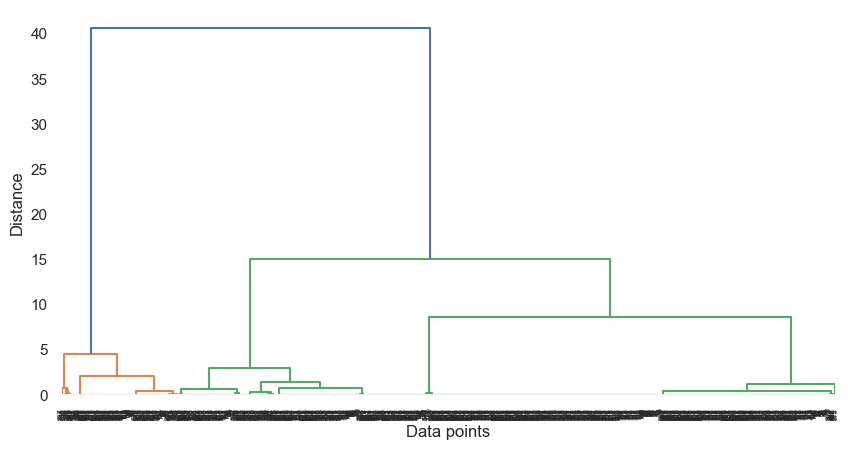

[ 9 10 12  9 11 12 12  6 11 11  9 11 11 11 12  5 12  6 12 11  4 11  3  4
  9 12  9 11 12 11  9  5  9 12 11  6 12  5 11  8 10 11  8 12  6  5 12  6
  2 11  6  5 12 11 11 10  4  5 11  8 11 11 11  5  4  9  5 11  5  4  5 12
 11  6  4  4 11 12  7 11  9 12  9  3 10  9  6  9 11 11 12  7 12 10 11  9
  4 10  3  9 10  9 11  3  6 12 12 12 12  3  4 12  4 12 11  4  4  5 12 11
 11  9 11 12  9 11 12 10 12 10 12 12  2  3 12 12  9 12 11  9 11 11 11 11
 11  2  5 12 11 11 11 11  6 11  6 11  4 11 12  6 11 11 12 10 11  5 12  6
  4 12 10 12 12 11  5 11 11  6 11  4  9 11 12  9  4  8  8  6  9  9 12  5
  9 11  4  9 11 11 11 11 11 11 12 11  5 11 11 11  6  7  9  5 11 11 11 11
  6  6 11 11  6 10 12 11  4  8 11  5 12 10  7 11 12  6 11 10 10 10 12 12
 11  4  7 11 11 11  9 11 12  9 11  5  5 11 12 10  4  1 11 11  4  9 11 10
 12  5 10 12 10  8  4  3  6  9 12 11 11 10  9 11 11 12 13 11 12 12 10 11
  8 12 12 11 11 11 11 11 12 11 12  8  5  6  4 10 12 11 11 12 10  3 11 12
 11  4 12 11 10 12  9 12 11  4 12 11 11  7  6 11 11

In [114]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute the linkage matrix
Z = linkage(R, 'ward')

# Plot the dendrogram
fig = plt.figure(figsize=(10, 5))
dn = dendrogram(Z)
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()
from scipy.cluster.hierarchy import fcluster

# Define the maximum distance between clusters
max_d = 0.5

# Get the cluster labels for the given maximum distance
labels = fcluster(Z, max_d, criterion='distance')

# Print the cluster labels
print(labels)


In [115]:
subset_df.columns

Index(['gender', 'age', 'group', 'longitude', 'latitude', 'device_model'], dtype='object')

In [116]:
subset_df['clusters']= cluster_labels

Performing DBSCAN 

In [117]:
from sklearn.cluster import DBSCAN

# Define the number of clusters and distance threshold
eps = 0.5
min_samples = 10


# Fit DBSCAN on the reduced dataset
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(R)

# Print the number of clusters and noise points
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = list(cluster_labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters)
print('Estimated number of noise points: %d' % n_noise)

Estimated number of clusters: 2
Estimated number of noise points: 0


##  DBSCAN clustering algorithm obtained two clusters without any noise points. This means that the algorithm has identified two groups of data points in your dataset, and all data points have been assigned to one of these two clusters.



In [118]:
subset_df['cluster_labels'] = cluster_labels

In [119]:
subset_df.drop('clusters', axis=1)

gender       age     group  longitude  latitude  device_model  \
996934  -0.749168 -1.076806 -0.749168  -1.457102 -1.395483     -0.749168   
448445  -0.830685  0.463469 -0.830685   0.719520  0.916876     -0.830685   
538679   0.229044 -0.768751  0.229044   0.677523  1.210874      0.229044   
371211  -0.749168 -0.974121 -0.749168   0.477942  0.564078     -0.749168   
1172375 -0.300821 -0.871436 -0.300821   0.656152  0.825481     -0.300821   
...           ...       ...       ...        ...       ...           ...   
658555  -0.300821  0.155414 -0.300821   0.790693  0.611373     -0.300821   
819486  -0.830685 -0.563381 -0.830685   0.487419  0.614569     -0.830685   
1186132  1.370291  0.052729  1.370291   0.565653  0.790329      1.370291   
703408   1.574085  0.668839  1.574085  -1.457102 -1.395483      1.574085   
597572   0.229044 -0.460696  0.229044   0.619916  0.023377      0.229044   

         cluster_labels  
996934                0  
448445                0  
538679                0  
371211                0  
1172375               0  
...                 ...  
658555                0  
819486                0  
1186132               1  
703408                1  
597572                0  

[1000 rows x 7 columns]

In [120]:
import plotly.graph_objects as go

# Define the dimensions for the parallel coordinates plot
dimensions = list([
    dict(label='Gender', values=subset_df['gender']),
    dict(label='Age', values=subset_df['age']),
    dict(label='Group', values=subset_df['group']),
    dict(label='Longitude', values=subset_df['longitude']),
    dict(label='Latitude', values=subset_df['latitude']),
    dict(label='Device Model', values=subset_df['device_model'])
])

# Define the color scale for the plot
color_scale = [[0, '#4CAF50'], [0.5, '#FFEB3B'], [1, '#F44336']]

# Create the parallel coordinates plot
fig = go.Figure(data=go.Parcoords(
    line=dict(color=subset_df['cluster_labels'],
              colorscale=color_scale),
    dimensions=dimensions
))

# Update the layout of the plot
fig.update_layout(
    title='Parallel Coordinates Plot',
    font=dict(size=12),
    height=500,
    width=1000,
    dragmode='lasso',
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

# Show the plot
fig.show()


In [121]:
import plotly.graph_objects as go
# Define the dimensions for the parallel coordinates plot
dimensions = []
for col in ['gender', 'age', 'group', 'longitude', 'latitude',
       'device_model',]:
    dim = dict(range=[df[col].min(), subset_df[col].max()],
               label=col, values=subset_df[col])
    dimensions.append(dim)

# Define the color scale for the plot
color_scale = [[0, '#4CAF50'], [0.5, '#FFEB3B'], [1, '#F44336']]

# Create the parallel coordinates plot
fig = go.Figure(data=go.Parcoords(
    line=dict(color=subset_df['cluster_labels'],
              colorscale=color_scale),
    dimensions=dimensions
))

# Update the layout of the plot
fig.update_layout(
    title="Parallel Coordinates Plot",
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    plot_bgcolor='rgba(0,0,0,0)'
)

# Show the plot
fig.show()


Very clear clusters formed 1 for female and 3 for male, another group is 84% male and 16% female
The last group has overlapping interests